In [375]:
#import libraries
import pandas as pd
import random
from collections import defaultdict, deque
import heapq
import math

In [376]:
# create the graph node
class Node():
    def __init__(self, coordinates, name):
        self.coordinates = coordinates
        self.name = name
        self.neighbors = set()
        self.charge = False

    def get_coordinates(self):
        return self.coordinates
    
    def is_charging_station(self):
        return self.charge
    
    # if the node is a charging station, set the power and cost
    def set_charging_station(self, power, cost):
        self.charge = True
        self.power = power
        self.cost = cost
    
    # we get the charging info if the node is a charging station
    def get_charging_info(self):
        if not self.charge:
            return None
        return [self.power, self.cost]
    
    def __lt__(self, other):
        # Define how nodes should be compared (e.g., based on their names)
        return self.name < other.name

In [400]:
# create the graph
class Graph():
    def __init__(self):
        self.nodes = set()
        self.coordinates = {}
        self.distance = defaultdict(dict)
        self.time = defaultdict(dict)
        self.get_node = {}
        self.names = set()

    def add_node(self, coordinates, name):
        node = Node(coordinates, name)
        self.nodes.add(node)
        self.names.add(name)
        self.coordinates[name] = coordinates
        self.get_node[name] = node
    
    def add_edge(self, node1, node2, distance):
        node1.neighbors.add(node2)
        node2.neighbors.add(node1)
        self.distance[node1][node2] = distance
        self.distance[node2][node1] = distance
        time = int(distance // 50 + random.randint(5, 20))
        self.time[node1][node2] = time
        self.time[node2][node1] = time

    # find the shortest path between two nodes
    def shortest_path(self, source, destination):
        start_node, end_node = self.get_node[source], self.get_node[destination]

        # function to find manhattan distance between a node and the end node
        heuristic_distance_from_end = lambda coordinates: abs(coordinates[0] - end_node.coordinates[0]) + abs(coordinates[1] - end_node.coordinates[1])

        # coefficients for the heuristic function
        h1 = 0 # coefficient for the heuristic distance from end point
        h2 = 1 # coefficient for the distance
        h3 = 1 # coefficient for the time
        full_charge = float('inf') # charge in terms of distance


        # find the shortest path
        visited = {}
        last_node = {}
        queue = [[0, 0, full_charge, start_node, [start_node.name]]] # [heuristic value, SoC(in distance), distance, node, path]
        count = 0

        while queue:
            count += 1
            heuristic, distance, charge, node, path = heapq.heappop(queue)
            if node == end_node:
                return distance, charge, path, len(queue)
            if node.charge: # fully charge at charging node
                charge = full_charge
                path[-1] = path[-1] + (' (charge)')
            if node not in visited or visited[node] > heuristic:
                visited[node] = heuristic
                for neighbor in node.neighbors:
                    new_charge = charge - self.distance[node][neighbor]
                    if new_charge < 40:
                        continue
                    neighbor_heuristic = h1 * (distance + self.distance[node][neighbor]) + h2 * heuristic_distance_from_end(neighbor.coordinates) + h3 * self.time[node][neighbor]
                    heapq.heappush(queue, [neighbor_heuristic, distance + self.distance[node][neighbor], new_charge, neighbor, path + [neighbor.name]])
        return float('inf'), 0, [], 0


In [401]:
graph = Graph()

# Read node data from nodes.csv
with open('nodes.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        node_name = row['Name']
        x = float(row['X'])
        y = float(row['Y'])
        graph.add_node((x, y), node_name)
        # add charging staions
        if 1 == random.randint(1, 3):
            graph.get_node[node_name].charge = True

# Read edge data from edges.csv
with open('edges.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        node1 = row['First Node']
        node2 = row['Second Node']
        distance = int(row['Distance'])
        graph.add_edge(graph.get_node[node1], graph.get_node[node2], distance)


In [380]:
# Calculate the shortest path between two random nodes and print it
shortest_path, charge, path_names, queue_length = graph.shortest_path("Node147", "Node49")
# Calculate the shortest path and print it
print(path_names, f"{charge} charge left")
print(queue_length)
print(f"Shortest path from {start_node.name} to {end_node.name} is:", shortest_path)

['Node147 (charge)', 'Node353 (charge)', 'Node110', 'Node463', 'Node390 (charge)', 'Node351 (charge)', 'Node161 (charge)', 'Node187', 'Node369 (charge)', 'Node318 (charge)', 'Node80 (charge)', 'Node49'] 363 charge left
54
Shortest path from Node112 to Node18 is: 1192


In [381]:
shortest_path, charge, path1, queue_length = graph.shortest_path("Node147", "Node49")
print("The following is the optimal path from Node7 to Node49:")
print()
print(" -> ".join(path_names))
print("Where (charge) represents the charging stations")
print()
print(f"The final charge left in the vehicle is : {charge/4}%")
print(f"The length of path is {shortest_path}")

The following is the optimal path from Node7 to Node49:

Node147 (charge) -> Node353 (charge) -> Node110 -> Node463 -> Node390 (charge) -> Node351 (charge) -> Node161 (charge) -> Node187 -> Node369 (charge) -> Node318 (charge) -> Node80 (charge) -> Node49
Where (charge) represents the charging stations

The final charge left in the vehicle is : 90.75%
The length of path is 1192


In [399]:
shortest_path1, charge, path1, queue_length = graph.shortest_path("Node147", "Node49")

In [402]:
shortest_path2, charge, path2, queue_length = graph.shortest_path("Node147", "Node49")
print(path1,"\n" ,path2)
print(shortest_path1)
print(shortest_path2)

['Node147', 'Node432 (charge)', 'Node475 (charge)', 'Node431 (charge)', 'Node361 (charge)', 'Node391', 'Node474', 'Node164', 'Node139', 'Node321 (charge)', 'Node166 (charge)', 'Node31', 'Node280', 'Node485', 'Node91', 'Node100', 'Node12 (charge)', 'Node80', 'Node49'] 
 ['Node147 (charge)', 'Node329', 'Node379 (charge)', 'Node351', 'Node440 (charge)', 'Node307', 'Node349 (charge)', 'Node154', 'Node152 (charge)', 'Node49']
1792
4597


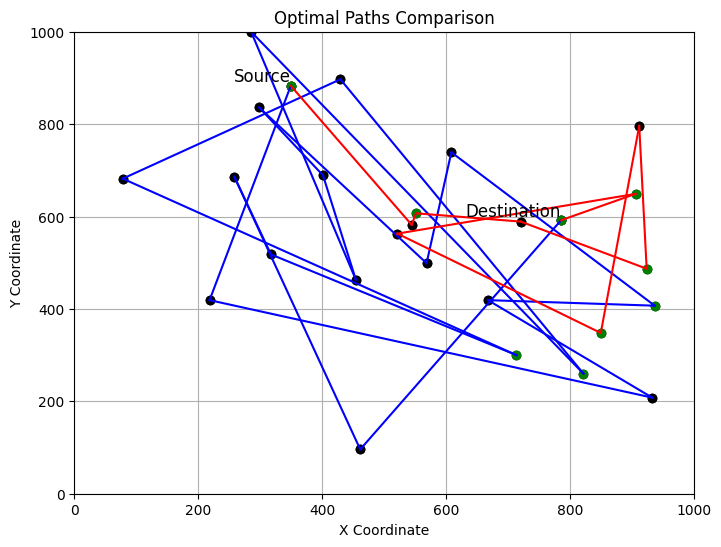

In [403]:
import matplotlib.pyplot as plt

# Define the range of x and y coordinates
x_range = (0, 1000)
y_range = (0, 1000)

# Plotting the nodes and charging stations
plt.figure(figsize=(8, 6))

# Plot nodes in black
for node_name in path1 + path2:
    if node_name not in graph.get_node:
        node_name, _ = node_name.split(' ')
    node = graph.get_node[node_name]
    plt.plot(node.coordinates[0], node.coordinates[1], 'ko')
    if node.charge:
        plt.plot(node.coordinates[0], node.coordinates[1], 'go')  # Charging station in green
    else:
        plt.plot(node.coordinates[0], node.coordinates[1], 'ko')  # Regular node in black

# Plot edges for path1 in blue
for i in range(len(path1) - 1):
    if path1[i] not in graph.get_node:
        path1[i], _ = path1[i].split(' ')
    node1 = graph.get_node[path1[i]]
    if path1[i+1] not in graph.get_node:
        path1[i+1], _ = path1[i+1].split(' ')
    node2 = graph.get_node[path1[i+1]]
    plt.plot([node1.coordinates[0], node2.coordinates[0]], [node1.coordinates[1], node2.coordinates[1]], 'b')

# Plot edges for path2 in red
for i in range(len(path2) - 1):
    if path2[i] not in graph.get_node:
        path2[i], _ = path2[i].split(' ')
    node1 = graph.get_node[path2[i]]
    if path2[i+1] not in graph.get_node:
        path2[i+1], _ = path2[i+1].split(' ')
    node2 = graph.get_node[path2[i+1]]
    plt.plot([node1.coordinates[0], node2.coordinates[0]], [node1.coordinates[1], node2.coordinates[1]], 'r')

# Add source and destination labels
source_node = graph.get_node[path1[0]]
dest_node = graph.get_node[path1[-1]]
plt.text(source_node.coordinates[0], source_node.coordinates[1], 'Source', fontsize=12, ha='right', va='bottom')
plt.text(dest_node.coordinates[0], dest_node.coordinates[1], 'Destination', fontsize=12, ha='right', va='bottom')

# Set axis limits and labels
plt.xlim(x_range)
plt.ylim(y_range)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Optimal Paths Comparison')
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import os
from geopy.distance import geodesic

# Define the file paths for nodes.csv and charging.csv within the 'data' folder
nodes_file = os.path.join('data', 'edges.csv')
edges_file = os.path.join('data', 'edges.csv')
charging_file = os.path.join('data', 'charging_with_nodes.csv')

# Load nodes.csv and charging.csv into pandas DataFrames
nodes_df = pd.read_csv(nodes_file)
charging_df = pd.read_csv(charging_file)
edges_df = pd.read_csv(edges_file)

0     11621752764
1       267198390
2       267198390
3       939091095
4       939091095
         ...     
68     7211752848
69      249782349
70     5415676370
71     6193896627
72     6193896627
Name: node_id, Length: 73, dtype: int64
